Dr. René Cejas Bolecek, 2016
Análisis Numérico del Profesorado y Licenciatura en Matemáticas de la Universidad de Comahue Regional Bariloche, Argentina

https://github.com/renexdev/anNumCRUB16

# Roots of Equations

- [Incremental Search Method](#Incremental Search Method)
- [Método de Bisección](#Método de Bisección)
- [Método de Ridder](#Método de Ridder)
- [Método de Newton-Rapson](#Método de Newton-Rapson)




# Incremental Search Method

('x =', '0.7346')


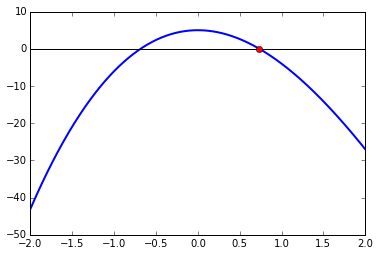

In [2]:
# Numerical Methods in Engineering with Python 3 3rd Edition (2013)
# by Jaan Kiusalaas
# Publisher: Cambridge University Press
# ISBN-10: 1107033853
# ISBN-13: 978-1107033856
# EXAMPLE 4.1  p. 147

import sys
sys.path.append("./../../modules/")
import numpy as np
import matplotlib.pyplot as plt
from rootsearch import *
%matplotlib inline


P3 = lambda x: x**3 - 10.0*x**2 + 5.0

x1 = 0.0; x2 = 1.0
for i in range(4):
    dx = (x2 - x1)/10.0
    x1,x2 = rootsearch(P3,x1,x2,dx)
x = (x1 + x2)/2.0

print("x =", "{:6.4f}".format(x))

a=-2.
b=2.

x1 = np.linspace(a,b, num=500)
y1 = np.array([P3(x1[i]) for i in range(len(x1))])


plt.plot( x1, y1, linewidth=2.0)
plt.plot( [a,b],[0.,0.], "k-")
plt.plot(x, 0.,  'ro')
plt.xlim([a,b])
plt.show()

$\textbf{Tareas}$: 
- Qué problemas tiene el método con la función tan(x) en [0-2pi]

# Método de Bisección

In [3]:
# Numerical Methods in Engineering with Python 3 3rd Edition (2013)
# by Jaan Kiusalaas
# Publisher: Cambridge University Press
# ISBN-10: 1107033853
# ISBN-13: 978-1107033856
# EXAMPLE 4.2  p. 150

import sys
sys.path.append("./../../modules/")
import numpy as np
import matplotlib.pyplot as plt
from bisection import *
%matplotlib inline


P3 = lambda x: x**3 - 10.0*x**2 + 5.0
x = bisection(P3, 0.0, 1.0, tol = 1.0e-4)
print("x =", "{:6.4f}".format(x))

Pasos:  14
('x =', '0.7346')



 Termino busqueda soluciones
se encontraron 6 soluciones: 
[  0.           4.49340946   7.72525184  10.90412166  14.06619391
  17.22075527]


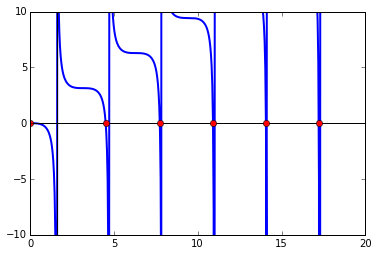

In [17]:
#!/usr/bin/python
## example4_3
import sys
sys.path.append("./../../modules/")
import numpy as np
import matplotlib.pyplot as plt
from math import *
from rootsearch import *
from bisection import *
%matplotlib inline

f = lambda x: x - math.tan(x)
a,b,dx = (.0, 20.0, 0.01)

#i = 0
a1 = a
rootSols = []
while True:
    x1,x2 = rootsearch(f,a1,b,dx)
    #print x1, x2
    if x1 != None:
        a1 = x2
        root = bisection(f,x1,x2,1,1.0e-9)
        if root != None: 
            #print(root)
            rootSols.append(root)
   
    #i = i +1
    if( x1 == None and x2 == None):# or  i>30): 
        print("\n Termino busqueda soluciones")
        break
print "se encontraron %d soluciones: "%(len(rootSols))
print np.array([rootSols[i] for i in range(len(rootSols))])
x1 = np.linspace(a,b, num=500)
y1 = np.array([f(x1[i]) for i in range(len(x1))])

plt.plot( x1, y1, linewidth=2.0)
plt.plot( [a,b],[0.,0.], "k-")

plt.plot( rootSols,np.array([0 for i in range(len(rootSols))]), "ro")

plt.plot( [pi*0.5,pi*0.5],[-400.,800.], "k-")
plt.xlim([a,b])
plt.ylim([-10.,10.])
plt.show()

# Método de Ridder

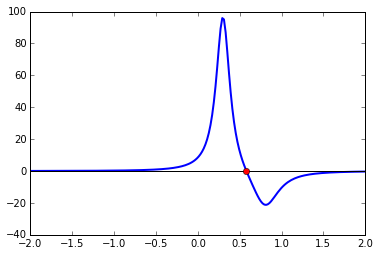

Raiz en  0.58


In [1]:
#!/usr/bin/python
## example4_5 p.156
import sys
sys.path.append("./../../modules/")
from ridder import *
import numpy as np
import matplotlib.pyplot as plt
from math import *
from rootsearch import *
from bisection import *
%matplotlib inline

f = lambda x: 1.0/((x - 0.3)**2 + 0.01)- 1.0/((x - 0.8)**2 + 0.04)
a = -2
b = 2
x1 = np.linspace(a,b, num=200)
y1 = np.array([f(x1[i]) for i in range(len(x1))])
plt.plot( x1, y1, linewidth=2.0)
plt.plot( [a,b],[0.,0.], "k-")
plt.plot( ridder(f,0.0,1.0),0.0, "ro")
plt.xlim([a,b])

plt.show()



print "Raiz en ",ridder(f,0.0,1.0)

# Método de Newton-Rapson

In [5]:
#!/usr/bin/python
## Ejemplo 4.6 p.159
import sys
sys.path.append("./../../modules/")
from ridder import *
import numpy as np
import matplotlib.pyplot as plt
from math import *
from newtonRaphson import *
%matplotlib inline

print "Calcule el valor de sqrt(2)"
f = lambda x: x**2-2
df = lambda x: 2*x
a = 0
b = 2

root = newtonRaphson(f,df,a,b,1.0e-9)
print "Root =",root


Calcule el valor de sqrt(2)
Root = 1.41421356237


Primero grafique la función para elegir un valor de x0 adecuado
Root = 2.1000000007
Number of iterations = 19


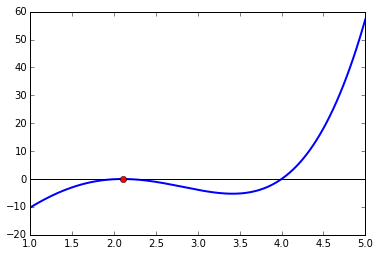

In [4]:
#!/usr/bin/python
## Ejemplo 4.8 p.159
import sys
sys.path.append("./../../modules/")
from ridder import *
import numpy as np
import matplotlib.pyplot as plt
from math import *
from newtonRaphson import *
%matplotlib inline


f = lambda x:  x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752
df = lambda x:  4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538

def newtonRaphson(x,tol=1.0e-9):
    for i in range(500):
        dx = -2*f(x)/df(x)
        x = x + dx
        if abs(dx) < tol: return x,i
    print 'Too many iterations'

root,numIter = newtonRaphson(3.)
print "Primero grafique la función para elegir un valor de x0 adecuado"
print 'Root =',root
print 'Number of iterations =',numIter

a= 1
b = 5

x1 = np.linspace(a,b, num=200)
y1 = np.array([f(x1[i]) for i in range(len(x1))])
plt.plot( x1, y1, linewidth=2.0)
plt.plot( [a,b],[0.,0.], "k-")
plt.plot( root ,0.0, "ro")
plt.xlim([a,b])

plt.show()


$\textbf{Tareas}$: 
- Cambie el valor de $x_{\rm 0}$ y discuta como es la convergencia global a cero del Método de N-R

In [3]:
#!/usr/bin/python
## Ejemplo 4.9 p.165
import sys
sys.path.append("./../../modules/")
from ridder import *
from numpy import zeros,array
import matplotlib.pyplot as plt
from math import sin,log
from newtonRaphsonSEnoL import *
%matplotlib inline

def f(x):
    f = zeros((len(x)),dtype=float)
    f[0] = sin(x[0]) + x[1]**2 + log(x[2]) - 7.0
    f[1] = 3.0*x[0] + 2.0**x[1] - x[2]**3 + 1.0
    f[2] = x[0] + x[1] + x[2] - 5.0
    return f


x = array([1.0, 1.0, 1.0])
print newtonRaphsonSEnoL(f,x)

[ 0.59905376  2.3959314   2.00501484]


Cuentas a mano, graficamos para estimar el valor de x0


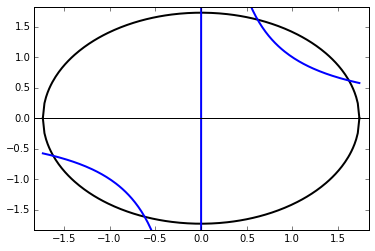

In [16]:
#!/usr/bin/python
## Ejemplo 4.8 p.164
import sys
sys.path.append("./../../modules/")
from numpy import zeros,array
import numpy as np
import matplotlib.pyplot as plt
from math import sin,log,sqrt
from newtonRaphsonSEnoL import *
%matplotlib inline

print "Cuentas a mano, graficamos para estimar el valor de x0"

f1 = lambda x: sqrt(3-x**2)
f2 = lambda x: 1./(x*1.)

a= -sqrt(3.)
b = sqrt(3.)
offset = 0.1
x1 = np.linspace(a,b, num=200)
y1a = np.array([f1(x1[i]) for i in range(len(x1))])
y1b = np.array([-f1(x1[i]) for i in range(len(x1))])
y2 = np.array([f2(x1[i]) for i in range(len(x1))])

plt.plot( x1, y1a,"k",x1, y1b, "k",linewidth=2.0)
plt.plot( x1, y2, linewidth=2.0)
plt.plot( [a-offset,b+offset],[0.,0.], "k-")
plt.xlim([a-offset,b+offset])
plt.ylim([a-offset,b+offset])
plt.show()
